## Global Analysis

In [6]:
!python -m spacy download es_core_news_lg -q
import spacy
nlp=spacy.load("es_core_news_lg")

[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [7]:
import joblib
from joblib import load 
from joblib import dump

In [8]:
import nltk
import pandas as pd
import numpy as np
from IPython.display import display
!pip install --upgrade matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

from sklearn.utils import shuffle
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.utils import shuffle

In [10]:
df2=pd.read_csv('GII.csv')
df2

,N°,Resena,Continente
0,1,"""Gladiator 2"" es una secuela que, aunque no al...",EEUU
1,2,"Como fanático de ""Gladiator"", esperaba mucho d...",EEUU
2,3,"Lamentablemente, ""Gladiator 2"" no está a la al...",EUROPE
3,4,Una película visualmente impresionante con sec...,EEUU
4,5,"""Gladiator 2"" logra mantener el espíritu de la...",EUROPE
5,6,Se siente como una secuela innecesaria. Aunque...,EEUU
6,7,"Entretenida, pero lejos de la original. ""Gladi...",EEUU
7,8,"Me sorprendió gratamente ""Gladiator 2"". Aunque...",EEUU
8,9,Aunque tiene buenas escenas de acción y una ba...,EEUU
9,10,Un intento fallido de revivir una historia que...,EUROPE


In [21]:

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)  
    texto = re.sub(r'\d+', '', texto)     
    palabras =word_tokenize(texto)
    doc = nlp(' '.join(palabras))
    palabras = [token.lemma_ for token in doc]
    return ' '.join(palabras)

df_texto=df2['Resena'].apply(limpiar_texto)


In [23]:
model_X= load("modelo_SVC.pkl")
vectorizer=load("vectorizador_tfidf.pkl")


In [25]:
mapeo_sentimientos = {-1: 'NEG', 0: 'NEU',1: 'POS'}
df2=pd.read_csv('GII.csv')
predictions=[]
for index,row in df2.iterrows():
    comentarios=row['Resena']
    continente=row['Continente']
    text=limpiar_texto(comentarios)
    text_vec=vectorizer.transform([text])
    pred=model_X.predict(text_vec) 
    sent_map = mapeo_sentimientos[pred[0]]
    text_pred=comentarios,continente,sent_map
    predictions.append(text_pred)
   
Df_Global=pd.DataFrame(predictions,columns=['Review','Continent','Sentiment'])

pd.set_option('display.max_colwidth', None)
Df_Global.to_csv('GLOBAL.csv')   
Df_Global   

,Review,Continent,Sentiment
0,"""Gladiator 2"" es una secuela que, aunque no alcanza la grandeza de su predecesora, ofrece una experiencia cinematográfica sólida. Las escenas de batalla son impresionantes, la cinematografía es excelente y la banda sonora vuelve a ser un punto fuerte. Paul Mescal, en el papel principal, demuestra un gran talento, aunque no logra igualar la intensidad de Russell Crowe. A pesar de ello, sigue siendo un gran espectáculo visual y un digno sucesor del clásico.",EEUU,NEU
1,"Como fanático de ""Gladiator"", esperaba mucho de esta secuela. Aunque tiene momentos épicos, la trama se siente un poco forzada. Hay secuencias bien logradas, pero el guion no tiene el mismo impacto emocional que la primera película. Paul Mescal ofrece una actuación convincente, pero no logra transmitir la misma carga emocional que Russell Crowe en la original. Es entretenida, pero no memorable.",EEUU,NEU
2,"Lamentablemente, ""Gladiator 2"" no está a la altura de su legado. Si bien la producción es impecable, el guion carece de profundidad y los personajes no generan la misma empatía que en la primera entrega. Denzel Washington destaca con su presencia imponente, pero su papel no está tan desarrollado como se esperaba. Se siente más como un intento de capitalizar la nostalgia que como una continuación necesaria.",EUROPE,NEG
3,"Una película visualmente impresionante con secuencias de acción que realmente te transportan a la antigua Roma. La dirección de Ridley Scott sigue siendo magistral y se nota el esmero en los detalles históricos. Pedro Pascal brilla con su interpretación, aportando una gran presencia en pantalla. Aunque la historia no logra el mismo impacto emocional que su predecesora, es un deleite para los amantes del cine épico.",EEUU,POS
4,"""Gladiator 2"" logra mantener el espíritu de la primera película con escenas de batalla bien coreografiadas y una banda sonora poderosa. No obstante, la falta de un personaje tan icónico como Máximo resta un poco de fuerza a la narrativa. Paul Mescal hace un gran trabajo, pero la sombra de Russell Crowe es demasiado grande. Aun así, es una película digna de verse en la pantalla grande.",EUROPE,POS
5,"Se siente como una secuela innecesaria. Aunque la cinematografía es espectacular y las escenas de acción están bien logradas, el guion es predecible y poco inspirado. Denzel Washington entrega una actuación sólida, pero su personaje no tiene suficiente desarrollo para ser realmente memorable. No logra emocionar como la original.",EEUU,NEU
6,"Entretenida, pero lejos de la original. ""Gladiator 2"" cumple con ofrecer acción y drama, pero carece de una historia realmente atrapante. Hay momentos de gran espectacularidad, pero también otros que se sienten demasiado forzados. Pedro Pascal es un gran acierto en el reparto, pero no logra salvar del todo el guion. Si bien no es una mala película, tampoco es una secuela memorable.",EEUU,NEU
7,"Me sorprendió gratamente ""Gladiator 2"". Aunque no esperaba que estuviera a la altura de la primera, logra construir su propia identidad y ofrece un espectáculo visual impresionante. Las batallas son emocionantes y la historia, aunque diferente, es lo suficientemente atractiva para mantener el interés. Paul Mescal demuestra ser un protagonista fuerte, con una interpretación llena de energía y determinación.",EEUU,NEU
8,"Aunque tiene buenas escenas de acción y una banda sonora impresionante, la historia de ""Gladiator 2"" no logra cautivar de la misma manera que la primera. Es un buen intento de continuación, pero le falta profundidad en los personajes. Denzel Washington y Pedro Pascal hacen un buen trabajo, pero sus personajes no están bien desarrollados.",EEUU,NEU
9,"Un intento fallido de revivir una historia que ya tenía un cierre perfecto. La película se siente innecesaria y aunque los efectos visuales son de primer nivel, el guion es flojo y los nuevos personajes no generan el mismo impacto que en la original. A pesar de contar con actores talentosos c

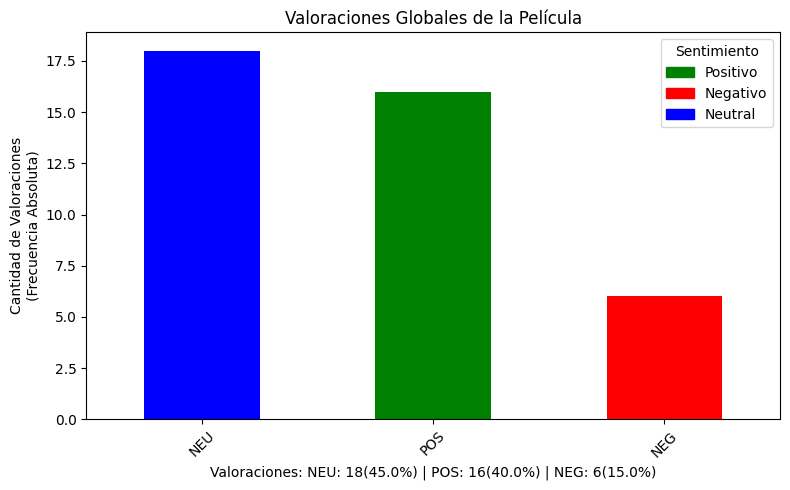

In [27]:
Global_sentiment= Df_Global['Sentiment'].value_counts()
frecuency_rel = Global_sentiment / Global_sentiment.sum() * 100 
category=['POS', 'NEU', 'NEG']
Global_sentiment2 = Global_sentiment.reindex(category, fill_value=0)
colors= {'POS': 'green', 'NEG': 'red', 'NEU': 'blue'}
ax=Global_sentiment.plot(kind='bar',figsize=(8, 5),color=[colors[label] for label in Global_sentiment.index])
plt.title('Valoraciones Globales de la Película')
sentiment_text = " | ".join([f"{key}: {value}({frecuency_rel[key]:.1f}%)" for key, value in Global_sentiment.items()])
plt.xlabel(f"Valoraciones: {sentiment_text}")
plt.ylabel('Cantidad de Valoraciones\n(Frecuencia Absoluta)' )
plt.xticks(rotation=45)
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in colors.keys()]
labels = ['Positivo', 'Negativo', 'Neutral']  
plt.legend(handles, labels, title='Sentimiento', loc='upper right')

plt.tight_layout()

plt.show()

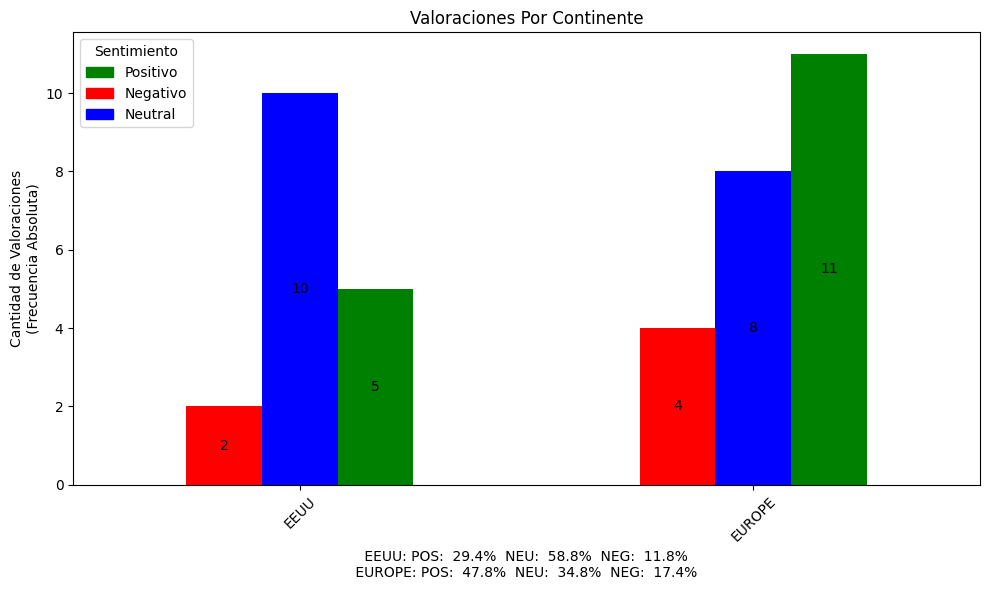

In [29]:
Global_sentiment =  Df_Global.groupby(['Continent', 'Sentiment']).size().unstack(fill_value=0)

# Crear gráfico de barras apiladas
ax=Global_sentiment.plot(kind='bar', stacked=False, figsize=(10, 6), color={'POS': 'green', 'NEG': 'red','NEU':'blue'})
frecuencia_rel= Global_sentiment.div(Global_sentiment.sum(axis=1), axis=0) * 100
frecuencia_rel= frecuencia_rel.reindex(columns=category, fill_value=0)
frecuencia_text ="\n ".join([
    f"{continent}: "+" ".join([f"{col}:  {frecuencia_rel.loc[continent, col]:.1f}% " for col in frecuencia_rel.columns])
    for continent in frecuencia_rel.index
])
plt.title('Valoraciones Por Continente')
plt.xlabel(f" {frecuencia_text}")
plt.ylabel('Cantidad de Valoraciones\n(Frecuencia Absoluta)')
plt.xticks(rotation=45)
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in colors.keys()]
labels = ['Positivo', 'Negativo', 'Neutral']  # Describe los colores en la leyenda
plt.legend(handles, labels, title='Sentimiento', loc='upper left')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center') 
plt.tight_layout()
plt.show()